In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 32'],inplace=True,axis=1)

In [11]:
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
371,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.5,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
468,9113538,M,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,...,21.57,28.87,143.6,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240
423,906878,B,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,...,15.14,25.50,101.4,708.8,0.1147,0.3167,0.3660,0.14070,0.2744,0.08839


In [12]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [14]:
df.drop(['id'],inplace=True,axis=1)

In [16]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

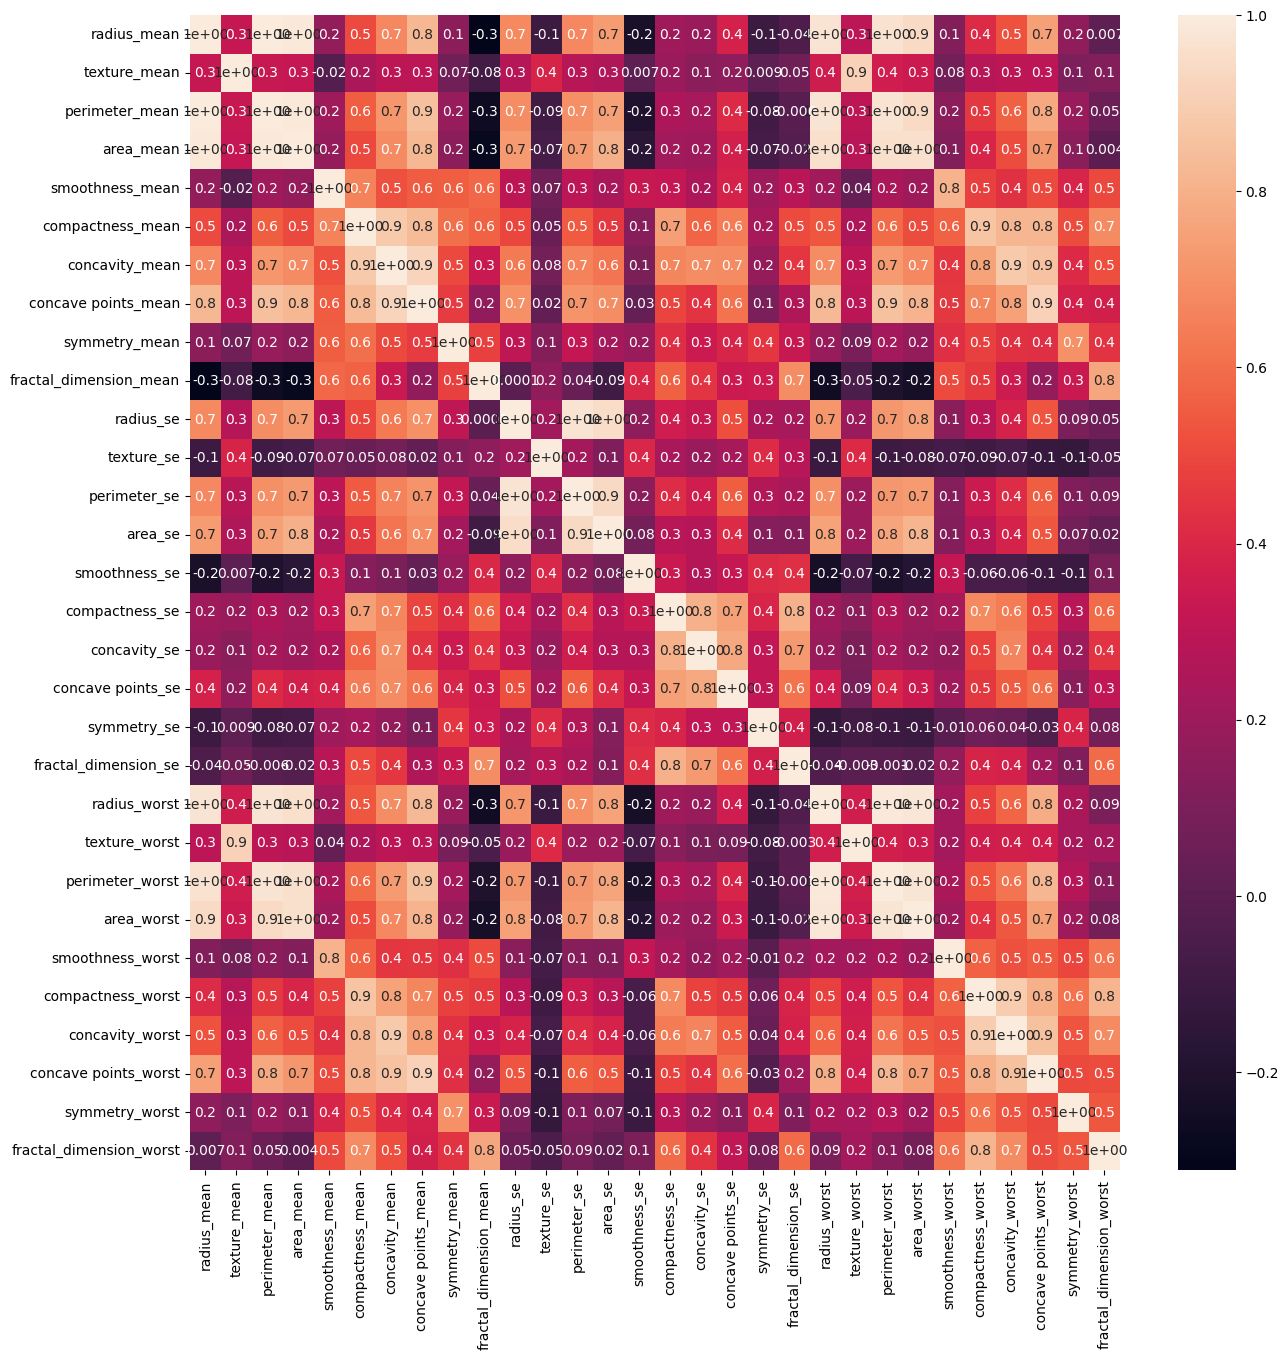

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='0.1')

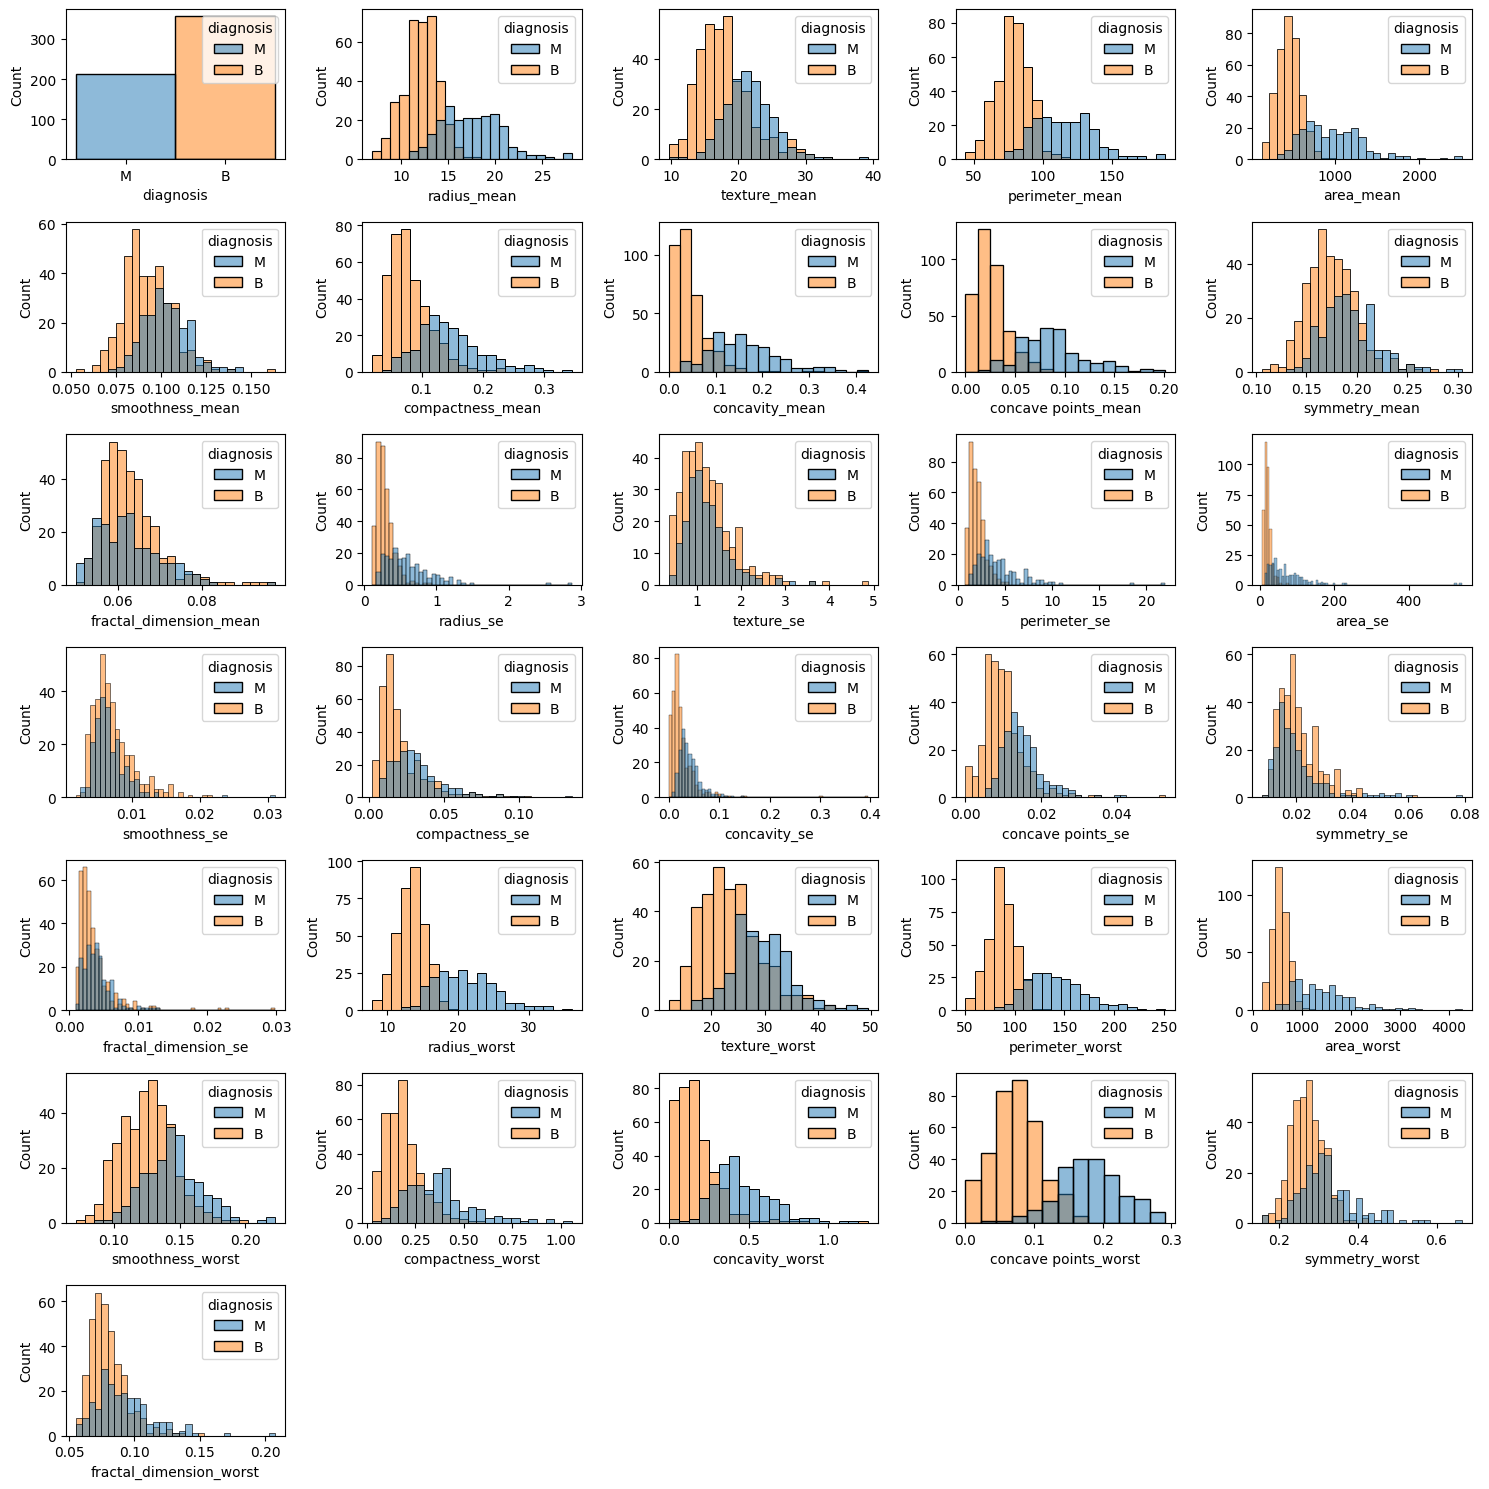

In [35]:
plt.figure(figsize=(15,15))
for id,column in enumerate(df.columns):
  plt.subplot(7,5,id+1)
  sns.histplot(df,x=column,hue='diagnosis')

  plt.tight_layout()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [39]:
df['diagnosis'] = df['diagnosis'].map({'B':1,'M':0})

In [40]:
df.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
180,0,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.26880,0.2856,0.08082
513,1,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,...,16.76,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048
475,1,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,...,14.09,19.35,93.22,605.8,0.1326,0.2610,0.3476,0.09783,0.3006,0.07802


In [41]:
from sklearn.model_selection import train_test_split

In [43]:
x = df.iloc[:,1:]
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
y = df.iloc[:,0]
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [50]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
y_pred = lr.predict(x_test)
y_pred

array([ 0.62168355,  0.17803853,  0.27512068,  1.1320503 ,  1.11698318,
       -0.66303713, -0.07355607,  0.44212355,  0.28085763,  0.96360261,
        0.794142  ,  0.33192584,  0.90481757,  0.39666504,  0.9336697 ,
        0.17750175,  0.91013271,  1.19445658,  1.41615414,  0.04464718,
        0.65041677,  0.8752756 , -0.38792384,  1.08061015,  0.96215276,
        0.84678947,  0.99807141,  0.87049439,  0.94386257, -0.16893149,
        1.0238613 ,  1.04190872,  0.81604445,  0.9156589 ,  1.07186427,
        0.84289045,  0.48746626,  0.62375262,  0.25368547,  0.76842229,
        1.15259719,  0.03799193,  0.97126513,  0.99773732,  0.55160057,
        0.65587474,  0.91828081,  1.02580964,  0.80527854,  1.01543748,
        0.20974453, -0.07875586,  0.55842968,  0.59037896,  1.02323689,
        0.78572959,  0.93959678, -0.36416183,  0.55847881,  1.04937824,
        0.94406266, -0.1953921 , -0.35465216,  0.80776979,  0.90208492,
        0.58309865, -0.16982229, -0.15422403,  0.97877451,  0.83

In [57]:
lr.score(x_train,y_train)

0.7789778474553671

In [58]:
model = Sequential()

model.add(Dense(100,activation='relu',input_dim=30))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='relu'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 25)                2525      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.get_weights()

[array([[ 0.03311437, -0.08858415,  0.09742348, ...,  0.08117174,
          0.08607943, -0.14408243],
        [-0.10647359, -0.19256034, -0.00046006, ..., -0.17053768,
         -0.09419071,  0.09780084],
        [-0.19666481,  0.0750813 ,  0.12645443, ..., -0.13244015,
          0.04094414, -0.16791211],
        ...,
        [ 0.13798545,  0.21428625, -0.04773702, ...,  0.00448896,
          0.04206057,  0.14484484],
        [ 0.02431172,  0.1865695 , -0.00391433, ..., -0.00227763,
         -0.17683867, -0.00037678],
        [-0.11788169,  0.16056822, -0.11463713, ...,  0.10201819,
         -0.19930026,  0.16003935]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [63]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['Accuracy'])

In [65]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
15/15 [==============================] - 0s 5ms/step - loss: 0.1906 - Accuracy: 0.8527
Epoch 2/25
15/15 [==============================] - 0s 4ms/step - loss: 0.0930 - Accuracy: 0.8879
Epoch 3/25
15/15 [==============================] - 0s 5ms/step - loss: 0.0613 - Accuracy: 0.9473
Epoch 4/25
15/15 [==============================] - 0s 5ms/step - loss: 0.0475 - Accuracy: 0.9604
Epoch 5/25
15/15 [==============================] - 0s 4ms/step - loss: 0.0384 - Accuracy: 0.9714
Epoch 6/25
15/15 [==============================] - 0s 4ms/step - loss: 0.0335 - Accuracy: 0.9802
Epoch 7/25
15/15 [==============================] - 0s 3ms/step - loss: 0.0299 - Accuracy: 0.9846
Epoch 8/25
15/15 [==============================] - 0s 4ms/step - loss: 0.0265 - Accuracy: 0.9868
Epoch 9/25
15/15 [==============================] - 0s 3ms/step - loss: 0.0249 - Accuracy: 0.9868
Epoch 10/25
15/15 [==============================] - 0s 3ms/step - loss: 0.0231 - Accuracy: 0.9890
Epoch 11/25
15/15 [

In [71]:
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
xgb_pred = xgb.predict(x_test)

In [77]:
xgb.score(x_train,y_train)

1.0

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Initialize the KFold parameters
kfold = KFold(n_splits=5)
# Perform K-Fold Cross Validation
results = cross_val_score(xgb, x_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.60% (0.98%)


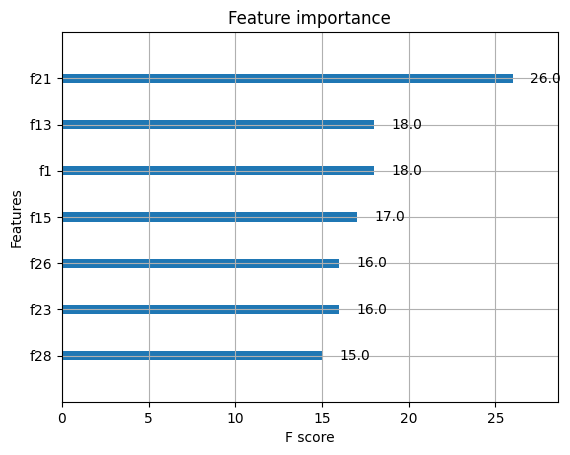

In [84]:
xgboost.plot_importance(xgb, max_num_features=7)
# Show the plot
plt.show()